In [177]:
import simpy
import numpy as np

In [2]:
class System(object):
    def __init__(self, env_, graph):
        self.env = env_
        
        self.action = env.process(self.run_simulation())
        
    def run_simulation():
        

SyntaxError: unexpected EOF while parsing (618359795.py, line 8)

In [ ]:
class Node(object):
    def __init__(self, name_):
        self.name = name_

In [3]:
env = simpy.Environment()

# station idx = [84,41,16,0,69,170,3,182,183]
# station id = [85,42,17,1,70,171,4,183,184]
station = [85,42,17,1,70,171,4,183,184]
station_capa = [10,10,10,10,10,10,10,10,10]
station_sp_resource = []
# simpy resource 를 차량 보관 량으로 정하고, 차가 도착하면 하나를 release 해주는 방식으로,
# 차가 나가도 hold 상태 / 차가 없어도 hold 상태, 즉 물리적으로 차가 없는 만큼 hold 해 두는 방식으로 구현
for i in range(len(station)):
    station_sp_resource.append(simpy.Resource(env, capacity=station_capa[i]))


# customer = Customer(env, 10)

# env.run()

In [4]:
import pandas as pd
import osmnx as ox


In [40]:
Gmpa_KAIST = ox.load_graphml('Final_KAIST.graphml')
df_request = pd.read_csv('request_data.csv')

In [6]:
Gmpa_KAIST.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

In [34]:
df_request

,Unnamed: 0,Time,startedge,startpart,endedge,endpart
0,0,2022-11-30 11:05:45,edge593,0.7,edge49,0.4
1,1,2022-11-30 11:36:30,edge542,0.7,edge203,0.1
2,2,2022-11-30 12:17:19,edge305,0.1,edge226,0.9
3,3,2022-11-30 12:51:50,edge394,0.6,edge357,0.5
4,4,2022-11-30 12:54:17,edge65,0.1,edge144,0.7
5,5,2022-11-30 13:36:13,edge399,0.5,edge104,0.6
6,6,2022-11-30 14:21:17,edge307,0.2,edge118,0.1
7,7,2022-11-30 16:41:52,edge58,0.4,edge178,0.3
8,8,2022-11-30 21:19:40,edge580,0.5,edge606,0.1
9,9,2022-11-30 22:51:21,edge55,0.4,edge119,0.6


In [8]:
gdf_nodes,gdf_edges = ox.graph_to_gdfs(Gmpa_KAIST)

In [9]:
west, south, east, north = gdf_edges.total_bounds
west, south, east, north

(127.3552754, 36.363388, 127.3696218, 36.3758309)

In [10]:
import plotly.tools

There are many limitations in mpl_to_plotly and we haven’t updated this code in years. The code is pretty gnarly and we decided to double down on the native plotly syntax instead of continuing to work on these converters.

So, if it works for you then that’s great! But if it doesn’t, I recommend:

Modifying the returned fig yourself after converting

Or, recreating the figure with the plotly syntax

Or, embedding the matplotlib figure as a static image in your app with html.Img(src='...') where source is the base64 encoded version of the image (https://stackoverflow.com/questions/38061267/matplotlib-graphic-image-to-base64 87)

In [11]:
import io

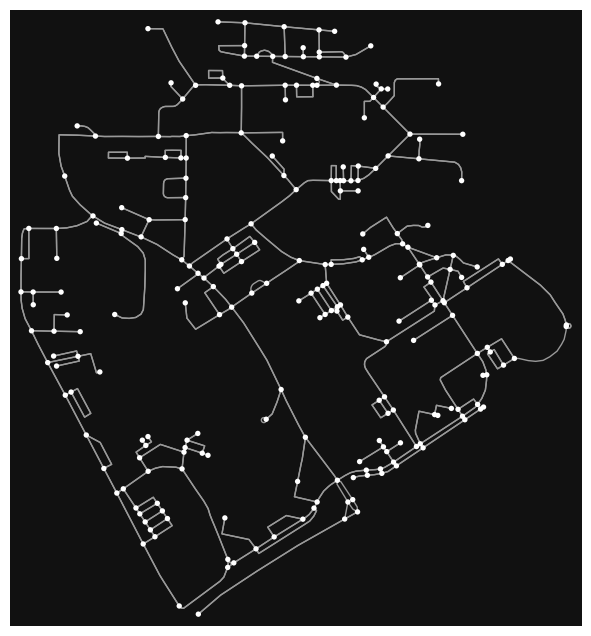

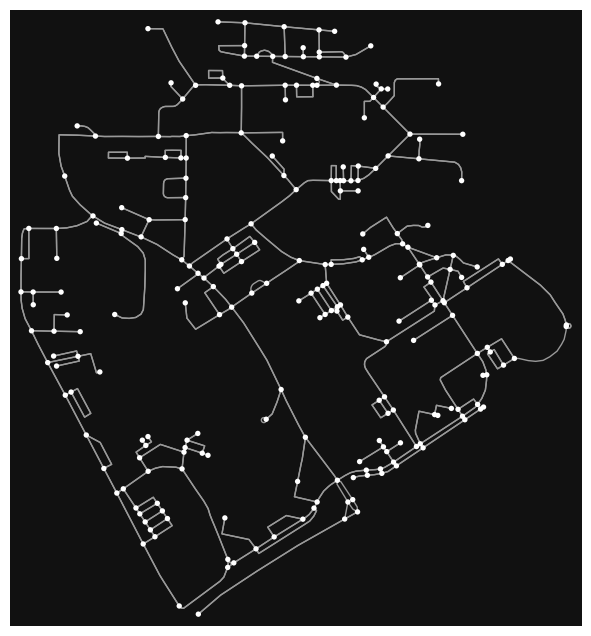

In [12]:
my_stringIObytes = io.BytesIO()
fig,ax = ox.plot_graph(Gmpa_KAIST)
fig
# my_stringIObytes.seek(0)
# my_base64_jpgData = base64.b64encode(my_stringIObytes.read())



In [13]:
import io
import base64

...

app.layout = html.Div(children=[
    ...,

    html.Img(id='example') # img element
])

@app.callback(
    dash.dependencies.Output('example', 'src'), # src attribute
    [dash.dependencies.Input('n_points', 'value')]
)
def update_figure(n_points):
    #create some matplotlib graph
    x = np.random.rand(n_points)
    y = np.random.rand(n_points)
    buf = io.BytesIO() # in-memory files
    plt.scatter(x, y)
    plt.savefig(buf, format = "png") # save to the above file object
    plt.close()
    data = base64.b64encode(buf.getbuffer()).decode("utf8") # encode to html elements
    return "data:image/png;base64,{}".format(data)




NameError: name 'html' is not defined

In [ ]:
Gmpa_KAIST.graph['crs']

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(gdf_nodes, x="x", y="y")

In [ ]:
fig

In [ ]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='usa',
    )
fig.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd


fig = go.Figure(data=go.Scattergeo(
        lon = gdf_nodes['x'],
        lat = gdf_nodes['y'],
        mode = 'markers',
        ))

for edgeidx in range(len(gdf_edges)):
    linestrings = gdf_edges['geometry'].iloc[edgeidx]
    x,y = linestrings.xy
    lats_data = y
    lons_data = x

    for i in range(len(lats_data)-1):
        fig.add_trace(go.Scattergeo(lon = [lons_data[i],lons_data[i+1]], lat = [lats_data[i],lats_data[i+1]] ,mode = 'lines', line = dict(width = 1,color = 'red'),)  )

fig.update_geos(lataxis_range = [36.3619,36.3773], lonaxis_range = [127.3537,127.3708])



In [ ]:
fig.update_layout(title={},
                  xaxis={},
                  yaxis={},
                  legend={})

In [17]:

import plotly.graph_objects as go
background = '#15171B'
papcolor = '#15171B'

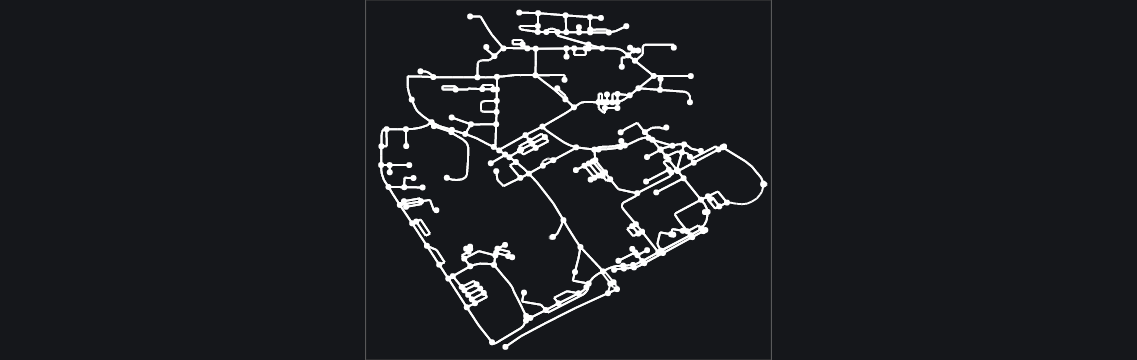

In [208]:
Gmpa_KAIST = ox.load_graphml('../Main/Final_KAIST.graphml')
gdf_nodes,gdf_edges = ox.graph_to_gdfs(Gmpa_KAIST)
fig = go.Figure(data=go.Scattergeo(
    lon=gdf_nodes['x'],
    lat=gdf_nodes['y'],
    mode='markers',
    marker_color='rgb(255, 255, 255)',
))

for edgeidx in range(len(gdf_edges)):
    linestrings = gdf_edges['geometry'].iloc[edgeidx]
    x, y = linestrings.xy
    lats_data = y
    lons_data = x

    for i in range(len(lats_data) - 1):
        fig.add_trace(go.Scattergeo(lon=[lons_data[i], lons_data[i + 1]], lat=[lats_data[i], lats_data[i + 1]],
                                    mode='lines', line=dict(width=2, color='white'), ))


fig.update_geos(lataxis_range=[36.3619, 36.3773], lonaxis_range=[127.3537, 127.3708])
fig.update_layout(showlegend=False, margin ={'t':0, 'r':0, 'b':0, 'l':0 }, plot_bgcolor = background, paper_bgcolor = papcolor, geo = dict(landcolor = background))


In [35]:
df_request

,Unnamed: 0,Time,startedge,startpart,endedge,endpart
0,0,2022-11-30 11:05:45,edge593,0.7,edge49,0.4
1,1,2022-11-30 11:36:30,edge542,0.7,edge203,0.1
2,2,2022-11-30 12:17:19,edge305,0.1,edge226,0.9
3,3,2022-11-30 12:51:50,edge394,0.6,edge357,0.5
4,4,2022-11-30 12:54:17,edge65,0.1,edge144,0.7
5,5,2022-11-30 13:36:13,edge399,0.5,edge104,0.6
6,6,2022-11-30 14:21:17,edge307,0.2,edge118,0.1
7,7,2022-11-30 16:41:52,edge58,0.4,edge178,0.3
8,8,2022-11-30 21:19:40,edge580,0.5,edge606,0.1
9,9,2022-11-30 22:51:21,edge55,0.4,edge119,0.6


In [20]:
gdf_nodes

,y,x,street_count,highway,geometry
osmid,,,,,
1,36.373472,127.365424,3,NaN,POINT (127.36542 36.37347)
2,36.374502,127.363504,3,NaN,POINT (127.36350 36.37450)
3,36.374487,127.361030,3,NaN,POINT (127.36103 36.37449)
4,36.374498,127.359831,3,NaN,POINT (127.35983 36.37450)
5,36.374210,127.359494,3,NaN,POINT (127.35949 36.37421)
...,...,...,...,...,...
240,36.370737,127.367833,3,NaN,POINT (127.36783 36.37074)
241,36.375111,127.361105,3,NaN,POINT (127.36110 36.37511)
242,36.370736,127.360491,3,NaN,POINT (127.36049 36.37074)


In [41]:
df_req = df_request[['Time','startedge','startpart','endedge','endpart']]

In [43]:
df_req


,Time,startedge,startpart,endedge,endpart
0,2022-11-30 00:38:18,346,0.1,55,0.5
1,2022-11-30 01:14:49,288,0.6,439,0.1
2,2022-11-30 04:06:03,542,0.9,371,1.0
3,2022-11-30 06:47:06,145,0.7,269,0.5
4,2022-11-30 06:52:44,52,0.4,200,0.9
5,2022-11-30 08:48:43,43,0.8,168,0.5
6,2022-11-30 12:33:01,585,0.1,607,0.0
7,2022-11-30 19:31:45,91,0.8,135,0.8
8,2022-11-30 20:06:59,249,0.0,22,0.3
9,2022-11-30 20:34:15,279,0.8,283,0.2


In [152]:
gdf_edges.iloc[346]

osmid                                               220230276
oneway                                                  False
name                                                      NaN
highway                                               service
maxspeed                                                   30
access                                                    yes
reversed                                                False
length                                                 87.396
geometry    LINESTRING (127.364178 36.3708317, 127.3641126...
service                                                   NaN
lanes                                                     NaN
bridge                                                    NaN
Name: (127, 128, 1), dtype: object

In [88]:
from shapely.ops import nearest_points
from shapely.geometry import Point
from shapely.geometry import LineString
from pyproj import CRS
from pyproj import Proj

# Gmpa_KAIST.graph["crs"]

'epsg:4326'

In [129]:
import geopandas as gpd
from geopy import distance

In [150]:


# nys = Proj("EPSG:4326")
# nys
A = list(gdf_edges.iloc[df_req.iloc[0].startedge].geometry.coords[0])
B = list(gdf_edges.iloc[df_req.iloc[0].startedge].geometry.coords[5])
p1 = [A[1],A[0]]
p2 = [B[1],B[0]]
p2
distance.distance(p1,p2).km * 1000

A = list(gdf_edges.iloc[df_req.iloc[0].startedge].geometry.coords)

sum = 0
for p_point_idx, p_point in enumerate(A):
    if p_point_idx == 0:
        p1 = [p_point[1],p_point[0]]
        continue
        
    p2 = [p_point[1],p_point[0]]
    print(p1,p2)
    dist = distance.distance(p1,p2).km * 1000
    p1 = p2
    sum += dist
print(sum)



# Point(A)

# ox.distance.shortest_path(Gmpa_KAIST,A,B)

# gpd.GeoSeries.to_crs()
# A


# A
# ox.distance.nearest_edges(Gmpa_KAIST,*A)




# nys(*A)
# d = Point(nys(*A)).distance(Point(nys(*B)))
# d
# A = list(gdf_edges.iloc[df_req.iloc[0].startedge].geometry.coords)

# for p_idx,p in enumerate(list(map(Point,map(nys,A)))):
    # print(p)
    
#     if p_idx == 0:
#         old_p = p
#         continue
    
#     distance = p.distance(old_p)
#     print(distance)
#     old_p = p

    
#     >>> from shapely.geometry import Point
# >>> 
# >>> 
# >>> p1 = Point(43.374880, -78.119956)
# >>> p2 = Point(43.374868, -78.119666)
# >>> p1_proj = nys(p1.y, p1.x)
# >>> p2_proj = nys(p2.y, p2.x)
# >>> d = Point(p1_proj).distance(Point(p2_proj))


[36.3708317, 127.364178] [36.3708975, 127.3641126]
[36.3708975, 127.3641126] [36.3708604, 127.3639579]
[36.3708604, 127.3639579] [36.3708352, 127.363701]
[36.3708352, 127.363701] [36.3708315, 127.3633684]
[36.3708315, 127.3633684] [36.370736, 127.3633672]
87.51928989928759


In [76]:
# for edgeidx in range(len(gdf_edges)):
#     linestrings = gdf_edges['geometry'].iloc[edgeidx]
#     x, y = linestrings.xy
#     lats_data = y
#     lons_data = x

#     for i in range(len(lats_data) - 1):
#         fig.add_trace(go.Scattergeo(lon=[lons_data[i], lons_data[i + 1]], lat=[lats_data[i], lats_data[i + 1]],
#                                     mode='lines', line=dict(width=2, color='white'), ))

# fig.add_trace(go.Scattergeo(lon=[lons_data[i], lons_data[i + 1]], lat=[lats_data[i], lats_data[i + 1]],
#                                     mode='lines', line=dict(width=2, color='white'), ))

In [190]:
def find_p_star(target_edge,part):
    A = list(target_edge.geometry.coords)
    all_length = target_edge.length
    length = all_length*part

    summ = 0
    for p_point_idx, p_point in enumerate(A):
        if p_point_idx == 0:
            p1 = [p_point[1],p_point[0]]
            continue

        p2 = [p_point[1],p_point[0]]
        dist = distance.distance(p1,p2).km * 1000
        oldsum = summ
        summ += dist
        if summ > length:
            break
        p1 = p2

    # sum-oldsum : p1 ~ p2 거리
    # p* 원하는 위치
    # (length-oldsum) : p1 ~ p* 거리
    ratio = (length-oldsum) / (summ-oldsum) # 비율
    p_star = [ratio*(ai-bi)+bi for ai,bi in zip(p2,p1)]
    return p_star




In [191]:
p_star_list = []
for req_idx in range(len(df_req)):
    target_edge = gdf_edges.iloc[df_req.iloc[req_idx].startedge]
    part = df_req.iloc[req_idx].startpart

    p_star = find_p_star(target_edge,part)
    p_star_list.append(p_star)

p_star_list
    

[[36.37089308682907, 127.36411698634313],
 [36.36757369871047, 127.36609956446719],
 [36.36961022971727, 127.36376495658034],
 [36.36553523658176, 127.36284505240711],
 [36.36601026908734, 127.3636027268423],
 [36.36766201381028, 127.36670044068616],
 [36.36648430247394, 127.36503420238095],
 [36.369986720293355, 127.35527844619017],
 [36.3698847, 127.3636102],
 [36.36766196772487, 127.36496189971491]]

In [206]:
import copy

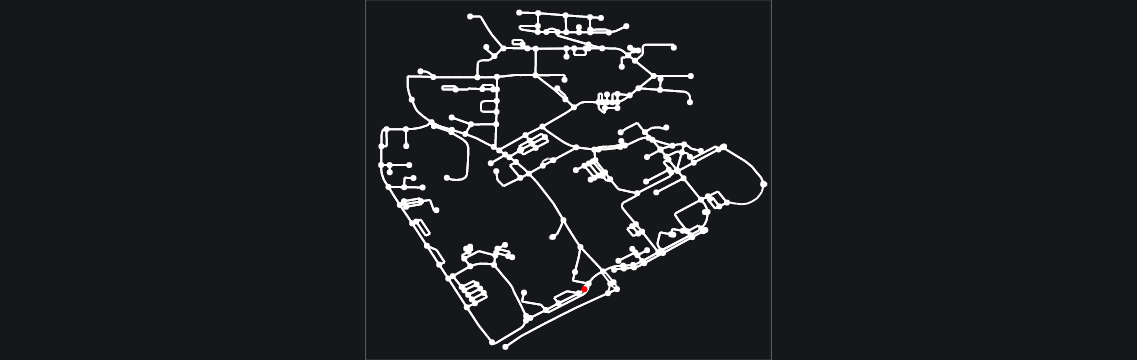

In [211]:
newfig = copy.deepcopy(fig)
newfig.add_trace(go.Scattergeo(lon=[item[1] for item in p_star_list[3:4]],lat=[item[0] for item in p_star_list[3:4]],mode='markers',marker_color='rgb(255, 0, 0)'))

#     for i in range(len(lats_data) - 1):
#         fig.add_trace(go.Scattergeo(lon=[lons_data[i], lons_data[i + 1]], lat=[lats_data[i], lats_data[i + 1]],
#                                     mode='lines', line=dict(width=2, color='white'), ))

In [210]:
df_req

,Time,startedge,startpart,endedge,endpart
0,2022-11-30 00:38:18,346,0.1,55,0.5
1,2022-11-30 01:14:49,288,0.6,439,0.1
2,2022-11-30 04:06:03,542,0.9,371,1.0
3,2022-11-30 06:47:06,145,0.7,269,0.5
4,2022-11-30 06:52:44,52,0.4,200,0.9
5,2022-11-30 08:48:43,43,0.8,168,0.5
6,2022-11-30 12:33:01,585,0.1,607,0.0
7,2022-11-30 19:31:45,91,0.8,135,0.8
8,2022-11-30 20:06:59,249,0.0,22,0.3
9,2022-11-30 20:34:15,279,0.8,283,0.2


In [213]:
gdf_edges.iloc[145]

osmid                                               468250685
oneway                                                  False
name                                                     카이서로
highway                                               service
maxspeed                                                   30
access                                              customers
reversed                                                 True
length                                                 36.999
geometry    LINESTRING (127.3626291 36.3653835, 127.362707...
service                                                   NaN
lanes                                                     NaN
bridge                                                    NaN
Name: (50, 189, 0), dtype: object

In [214]:
gdf_nodes.iloc[50]

y                                    36.36541
x                                  127.360594
street_count                                1
highway                                   NaN
geometry        POINT (127.360594 36.3654098)
Name: 51, dtype: object